In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Kohonen:
    def __init__(self, map_shape, learning_rate=0.1, sigma=1.0):
        self.map_shape = map_shape
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.weights = np.random.rand(map_shape[0], map_shape[1], 2) # Initialize the weight matrix

    def find_best_matching_unit(self, input_vector):
        distances = np.linalg.norm(self.weights - input_vector, axis=2) # Euclidean distance between input_vector and each weight vector
        bmu_index = np.unravel_index(np.argmin(distances), distances.shape) # Find the index of the best matching unit (BMU)
        return bmu_index

    def update_weights(self, input_vector, bmu_index):
        distance_squares = np.sum((np.indices(self.map_shape) - np.array(bmu_index)[:, np.newaxis, np.newaxis]) ** 2, axis=0)
        neighborhood = np.exp(-distance_squares / (2 * self.sigma ** 2))
        self.weights += self.learning_rate * neighborhood[:, :, np.newaxis] * (input_vector - self.weights)

    def train(self, input_data, num_epochs):
        for epoch in range(num_epochs):
            np.random.shuffle(input_data)

            for input_vector in input_data:
                bmu_index = self.find_best_matching_unit(input_vector)
                self.update_weights(input_vector, bmu_index)

    def get_weights(self):
        return self.weights

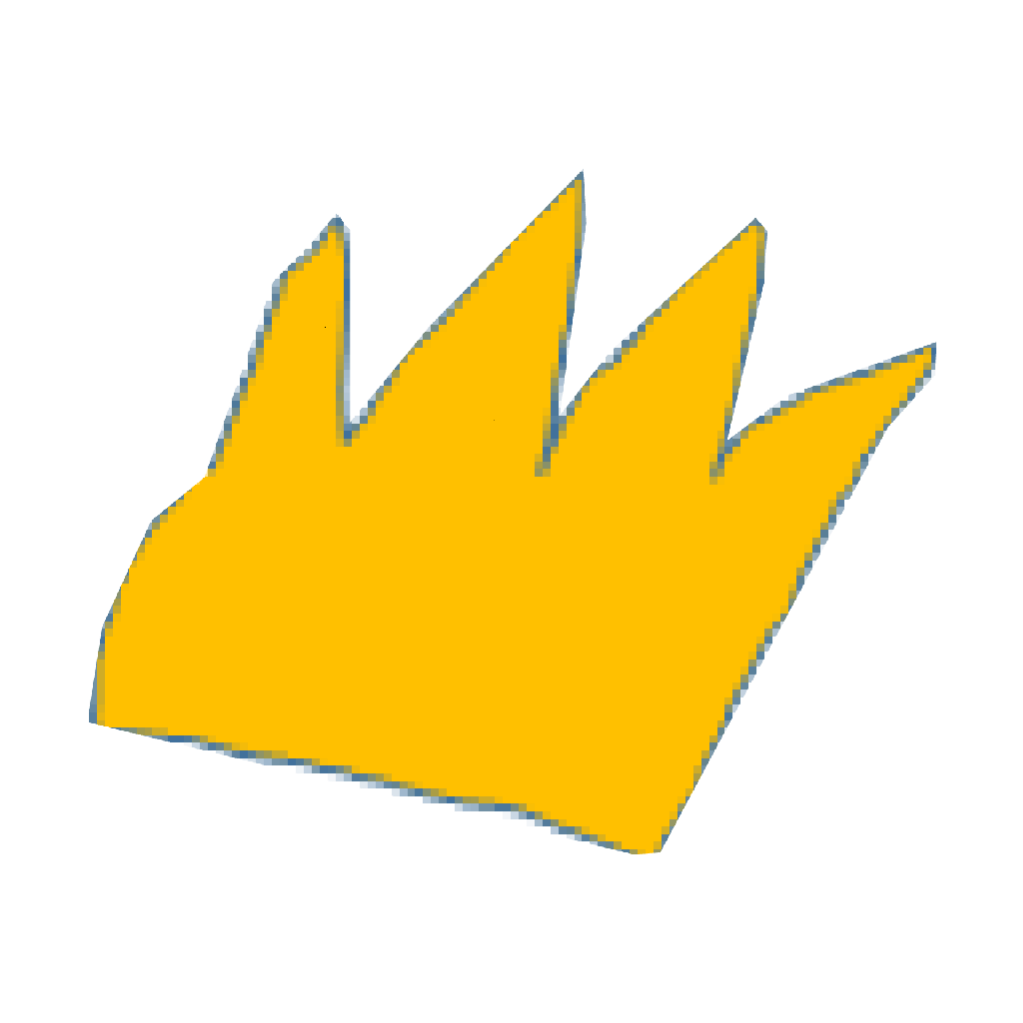

In [14]:
from IPython.display import Image

# Path to the JPG image file
hand_shape = "hand_shape.png"

# Display the image
Image(filename=hand_shape)

In [9]:
"""Uniform distribution of {(x, y) | x, y ∈ [0, 1]})}"""
# |x1 - x2| <|x1-x3| => |f(x1) - f(x2)| <|f(x1) - f(x3)|
epochs = [1, 50]
input_data = np.random.uniform(size=(3000, 2))
# Generate random hand shape data
input_dim = 2  # Dimensionality of input data (e.g., x and y coordinates)
# np.random.seed(0)
# # hand_shapes = np.random.rand(100, input_dim)  # Replace with your actual hand shape dataset
# hand_shape="hand_picture.jpg"

for epoch in epochs:

    kohonen_few_neurons = Kohonen(map_shape=(20, 20), learning_rate=0.1, sigma=1.0)
    kohonen_few_neurons.train(input_data, num_epochs=epoch)
    weights_few_neurons = kohonen_few_neurons.get_weights()

    kohonen_many_neurons = Kohonen(map_shape=(20, 20), learning_rate=0.1, sigma=1.0)
    kohonen_many_neurons.train(input_data, num_epochs=epoch)
    weights_many_neurons = kohonen_many_neurons.get_weights()

In [32]:
input_data

array([[0.55731651, 0.69849397],
       [0.55483334, 0.04812006],
       [0.97880453, 0.23533562],
       ...,
       [0.6843631 , 0.26966405],
       [0.66365462, 0.29847809],
       [0.22353542, 0.8933161 ]])

In [11]:
input_data[:, 0]

array([0.55731651, 0.55483334, 0.97880453, ..., 0.6843631 , 0.66365462,
       0.22353542])

In [63]:
input_data[:, 1]

array([0.0165929 , 0.56721224, 0.4761564 , 0.48134048, 0.67895446,
       0.34303402, 0.93685318, 0.37842072, 0.45438939, 0.13643855,
       0.72087178, 0.85233079, 0.65668212, 0.82271021, 0.44187691,
       0.57371753, 0.87109158, 0.9710428 , 0.00423127, 0.60197219,
       0.70600201, 0.3927959 , 0.91608715, 0.71288674, 0.76307506,
       0.00925906, 0.77181871, 0.62101271, 0.90412181, 0.40647934,
       0.93912554, 0.16568965, 0.97083815, 0.43973568, 0.32359385,
       0.25712905, 0.03894603, 0.96913915, 0.91717021, 0.21339834,
       0.94986068, 0.43257539, 0.54917331, 0.2631306 , 0.92239724,
       0.16213197, 0.21764624, 0.23461502, 0.13844426, 0.93742324,
       0.72844497, 0.95889043, 0.58752846, 0.99862978, 0.67887373,
       0.17768988, 0.59826136, 0.8775865 , 0.44795253, 0.92276372,
       0.89740576, 0.59712798, 0.35423635, 0.98204582, 0.76096466,
       0.67616636, 0.13914745, 0.19631128, 0.69838756, 0.88242663,
       0.94747172, 0.61406004, 0.42427406, 0.08544912, 0.52524

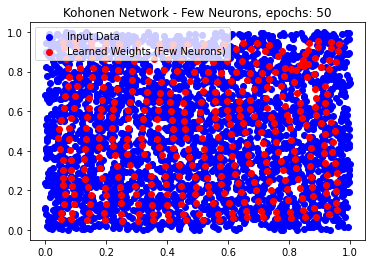

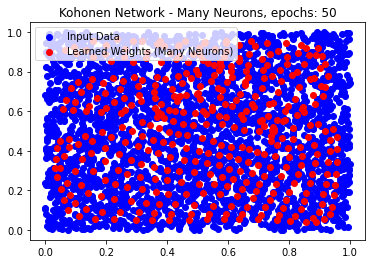

In [16]:

# plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
# plt.scatter(weights_few_neurons[:, :, 0], weights_few_neurons[:, :, 1], color='red', label='Learned Weights (Few Neurons)')

plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
plt.scatter(weights_few_neurons[:, :, 0], weights_few_neurons[:, :, 1], color='red', label='Learned Weights (Few Neurons)')



plt.title(f'Kohonen Network - Few Neurons, epochs: {epoch}')
plt.legend(loc='upper left')
plt.show()


plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
plt.scatter(weights_many_neurons[:, :, 0], weights_many_neurons[:, :, 1], color='red', label='Learned Weights (Many Neurons)')
plt.title(f'Kohonen Network - Many Neurons, epochs: {epoch}')
plt.legend(loc='upper left')
plt.show()


In [61]:
# import matplotlib.pyplot as plt
# from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# import numpy as np

# # Generate some random data
# np.random.seed(0)
# x = np.random.rand(1)
# y = np.random.rand(1)

# # Create a scatter plot
# fig, ax = plt.subplots()
# ax.scatter(x, y)

# # Path to the image file
# image_path = "hand_shape.png"

# # Load the image
# img = plt.imread(image_path)

# # Define the image box size and aspect ratio
# imagebox = OffsetImage(img, zoom=0.2)

# # Iterate over the data points and add the image at each point
# for i in range(len(x)):
#     ab = AnnotationBbox(imagebox, (x[i], y[i]), frameon=False)
#     ax.add_artist(ab)

# # Set the limits of the plot
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])

# # Display the plot
# plt.show()

In [ ]:
input_data = np.random.uniform(size=(3000, 2))
# Generate random hand shape data
input_dim = 2  # Dimensionality of input data (e.g., x and y coordinates)
# np.random.seed(0)
# # hand_shapes = np.random.rand(100, input_dim)  # Replace with your actual hand shape dataset
# hand_shape="hand_picture.jpg"

for epoch in epochs:

    kohonen_few_neurons = Kohonen(map_shape=(20, 20), learning_rate=0.1, sigma=1.0)
    kohonen_few_neurons.train(input_data, num_epochs=epoch)
    weights_few_neurons = kohonen_few_neurons.get_weights()

    kohonen_many_neurons = Kohonen(map_shape=(20, 20), learning_rate=0.1, sigma=1.0)
    kohonen_many_neurons.train(input_data, num_epochs=epoch)
    weights_many_neurons = kohonen_many_neurons.get_weights()

In [33]:
image_path="hand_shape.png"

In [76]:
image.shape

(1023, 1023, 4)

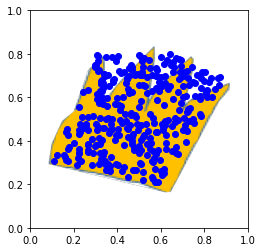

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path

# Define the shape coordinates
shape_x = [0.1,0.3,0.5,0.7,0.9,0.6]
shape_y = [0.3,0.8,0.8,0.8,0.7,0.2]
# Create the Path object
vertices = list(zip(shape_x, shape_y))
path = Path(vertices)


# Generate random points within the shape
num_points = 1000
points_x = []
points_y = []

for _ in range(num_points):
    # Generate a random point within the shape boundaries
    point_x, point_y = np.random.uniform(0, 1), np.random.uniform(0, 1)
    
    # Check if the point is within the shape
    is_inside = path.contains_point((point_x, point_y))
    if(is_inside):
        points_x.append(point_x)
        points_y.append(point_y)

# Plot the shape
# plt.plot(shape_x + [shape_x[0]], shape_y + [shape_y[0]], color='blue')
plt.imshow(image,extent=[0, 1.0, 0, 1.0])

# Scatter plot of the points within the shape
plt.scatter(points_x, points_y, color='blue')

# Set the limits of the plot
plt.xlim(0, 1)
plt.ylim(0, 1)

# Display the plot
plt.show()

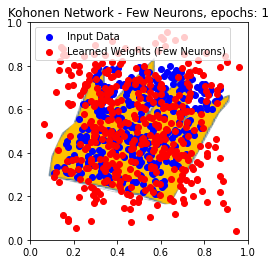

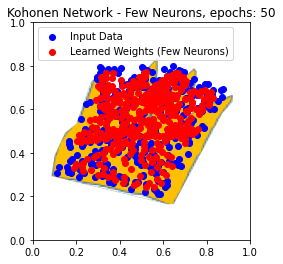

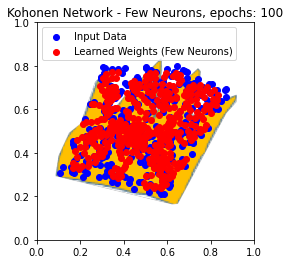

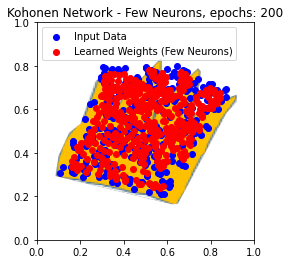

In [119]:
"""Uniform distribution of {(x, y) | x, y ∈ [0, 1]})}"""
# |x1 - x2| <|x1-x3| => |f(x1) - f(x2)| <|f(x1) - f(x3)|
epochs = [1,50,100,200]
# input_data = np.random.uniform(size=(500, 2))
input_data = np.column_stack((points_x,points_y))


for epoch in epochs:

    kohonen_few_neurons = Kohonen(map_shape=(20, 20), learning_rate=0.1, sigma=1.0)
    kohonen_few_neurons.train(input_data, num_epochs=epoch)
    weights_few_neurons = kohonen_few_neurons.get_weights()

    kohonen_many_neurons = Kohonen(map_shape=(20, 20), learning_rate=0.1, sigma=1.0)
    kohonen_many_neurons.train(input_data, num_epochs=epoch)
    weights_many_neurons = kohonen_many_neurons.get_weights()
  
    plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input Data')
    plt.scatter(weights_few_neurons[:, :, 0], weights_few_neurons[:, :, 1], color='red', label='Learned Weights (Few Neurons)')
    plt.imshow(image, extent=[0, 1.0, 0, 1.0])
    plt.title(f'Kohonen Network - Few Neurons, epochs: {epoch}')
    plt.legend(loc='upper left')

    plt.show()